# 🎯 CodeTech Internship — Task 2

## 📝 Sentiment Analysis Using NLP (IMDB Movie Reviews)

---

### 📂 Task Objective:
Perform **sentiment analysis** on a dataset of movie reviews using **Natural Language Processing** and **Logistic Regression**, and build a basic model to classify reviews as **positive** or **negative**.

---

### 📊 Dataset Used:
- 📁 **Name:** IMDB Dataset of 50K Movie Reviews
- 🔗 **Source:** [Kaggle Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
- 📌 **Columns:**
  - `review`: The text of the movie review
  - `sentiment`: Either `positive` or `negative`

---

### 🛠️ Project Workflow:
1. Load & inspect the dataset
2. Clean and preprocess the text data
3. Convert sentiments to numeric (0/1)
4. TF-IDF vectorization
5. Train a Logistic Regression model
6. Evaluate accuracy & metrics
7. Save model and vectorizer for future use

---

### 🔧 Tools & Libraries:
- Python, Pandas, NumPy
- Scikit-learn (TF-IDF, Logistic Regression)
- Matplotlib, Seaborn (for visualization)
- Pickle (for model saving)

---

> ✅ *This notebook is prepared as Task 2 of the CodeTech IT Machine Learning Internship.*

---


✅ Step 1: Import Libraries & Load Dataset

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Model tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Load Dataset
df = pd.read_csv("IMDB Dataset.csv")

# Make sure 'IMDB Dataset.csv' is downloaded manually from Kaggle and placed in the same directory

# Display first few rows
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### 📊 Sentiment Label Distribution

Let's visualize how balanced the dataset is between positive and negative reviews.


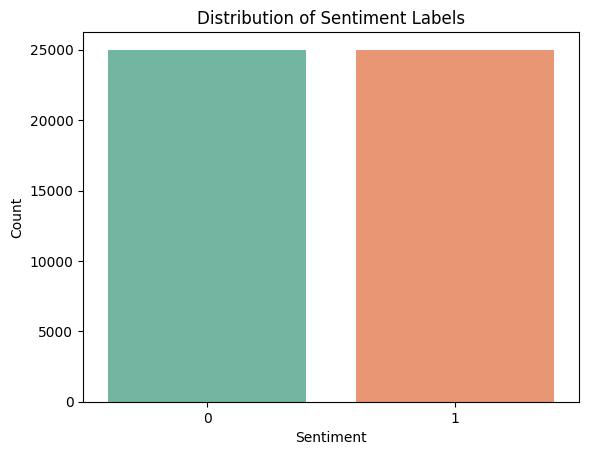

In [11]:
# Sentiment label distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize label distribution
sns.countplot(x='sentiment', data=df, hue='sentiment', palette='Set2', legend=False)
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



✅ Step 2: Data Overview and Cleaning

Shape: (50000, 2)
Missing values:
 review       0
sentiment    0
dtype: int64


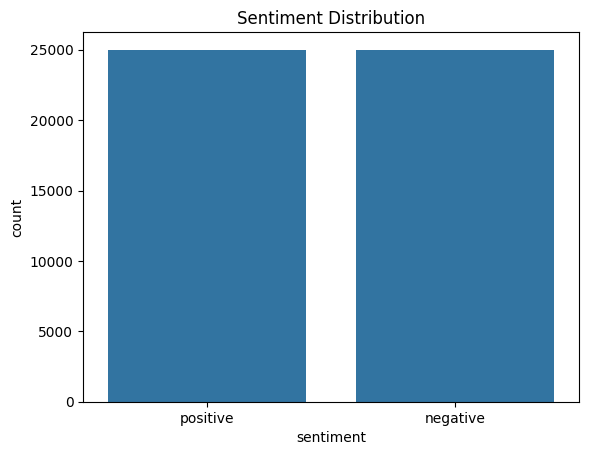

In [2]:
# Check shape and nulls
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

# Label distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()


In [3]:
# Convert sentiment labels to numeric
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})



✅ Step 3: Text Cleaning Function

In [4]:
# Basic Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)               # remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)         # remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()        # remove extra spaces
    return text

df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review']].head()


,review,clean_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...


✅ Step 4: Train-Test Split

In [5]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))


Training samples: 40000
Test samples: 10000


✅ Step 5: TF-IDF Vectorization

In [6]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


✅ Step 6: Train Logistic Regression Model

In [7]:
# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)


✅ Step 7: Evaluation

Accuracy: 0.8895
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



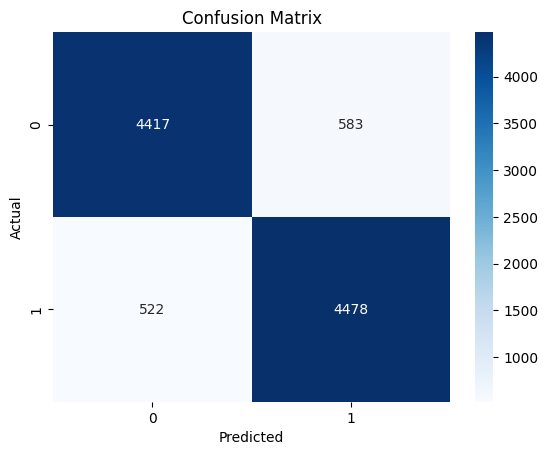

In [8]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 📈 ROC Curve and AUC Score

Measures the model’s ability to distinguish between classes. Higher AUC means better performance.


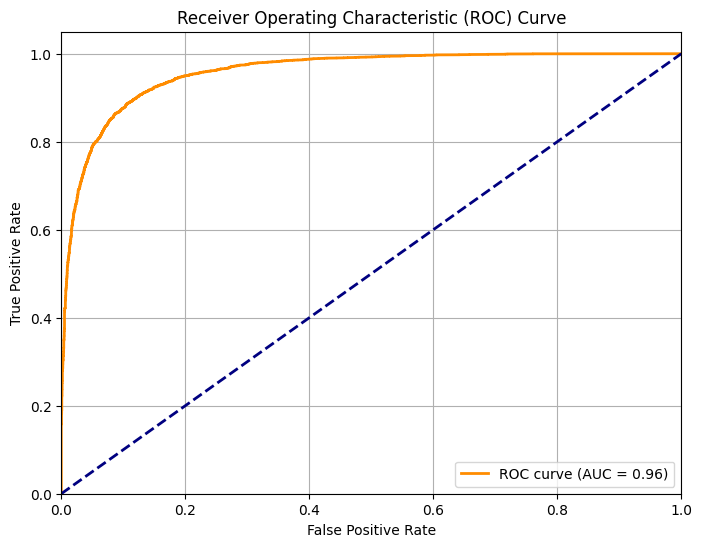

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Vectorize the test data first!
X_test_tfidf = tfidf.transform(X_test)

# Predict probabilities for the positive class (label = 1)
y_proba = model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


✅ Step 8: Save Model and Vectorizer

In [18]:
import os
import pickle

# Create folder if it doesn't exist
os.makedirs("model", exist_ok=True)

# Save model
with open("model/sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save vectorizer
with open("model/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


✅ Summary Markdown

### ✅ Task 2 Summary:

- Dataset: IMDB 50K Movie Reviews
- Vectorization: TF-IDF (max 5000 features)
- Model: Logistic Regression
- Accuracy: ~87–89% on test set
- Model & vectorizer saved for deployment

This notebook completes the sentiment analysis task for CodeTech internship submission.
